<a href="https://colab.research.google.com/github/yashc73080/CS462-Deep-Learning/blob/main/Lectures/Overfitting_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import torch.utils.data as data

In [2]:
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("CUDA device count:", torch.cuda.device_count())
    print("Current device index:", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("Running on CPU-only environment. GPU-specific cells will safely skip.")

PyTorch version: 2.8.0+cu126
CUDA available: True
CUDA device count: 1
Current device index: 0
Device name: Tesla T4


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

print(f"Training set shape: {trainset.data.shape}")
print(f"Testing set shape: {testset.data.shape}")

def preprocess_data(dataset):
    data = (dataset.data / 255.0) - 0.5
    targets = dataset.targets
    return data, targets

x_train, y_train = preprocess_data(trainset)
x_test, y_test = preprocess_data(testset)

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

x_train_small = x_train[ 0 : 10000 ]
y_train_small = y_train[ 0 : 10000 ]

train_dataset = data.TensorDataset(x_train_small, y_train_small)

batch_size = 64
train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 504kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.3MB/s]


Training set shape: torch.Size([60000, 28, 28])
Testing set shape: torch.Size([10000, 28, 28])


In [5]:
class MNIST_Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear( in_features = 784, out_features = 1000 )
    self.layer_2 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_3 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_4 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_5 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_6 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_7 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_8 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_9 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_10 = nn.Linear( in_features = 1000, out_features = 10 )

  def forward(self, x):
    input = nn.Flatten()( x )

    hidden_nodes = self.layer_1( input )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_2( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_3( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_4( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_5( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_6( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_7( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_8( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_9( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    logits = self.layer_10( hidden_nodes )

    return logits

In [6]:
model = MNIST_Network().to(device)

In [7]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [8]:
epochs = 200

In [9]:
loss_history = []
test_history = []

Epoch 1, Average Loss: 2.301449, Test Loss: 2.301834
Epoch 2, Average Loss: 2.301405, Test Loss: 2.301489
Epoch 3, Average Loss: 2.301172, Test Loss: 2.301390
Epoch 4, Average Loss: 2.301083, Test Loss: 2.301441
Epoch 5, Average Loss: 2.301117, Test Loss: 2.301170
Epoch 6, Average Loss: 2.300876, Test Loss: 2.301672
Epoch 7, Average Loss: 2.301025, Test Loss: 2.301198
Epoch 8, Average Loss: 2.301069, Test Loss: 2.301007
Epoch 9, Average Loss: 2.300670, Test Loss: 2.301177
Epoch 10, Average Loss: 2.300839, Test Loss: 2.301041
Epoch 11, Average Loss: 2.300719, Test Loss: 2.301014
Epoch 12, Average Loss: 2.300615, Test Loss: 2.300928
Epoch 13, Average Loss: 2.300691, Test Loss: 2.300852
Epoch 14, Average Loss: 2.300085, Test Loss: 2.300449
Epoch 15, Average Loss: 2.299726, Test Loss: 2.299256
Epoch 16, Average Loss: 2.297315, Test Loss: 2.293603
Epoch 17, Average Loss: 2.228486, Test Loss: 2.078477
Epoch 18, Average Loss: 1.867135, Test Loss: 1.719368
Epoch 19, Average Loss: 1.603821, Tes

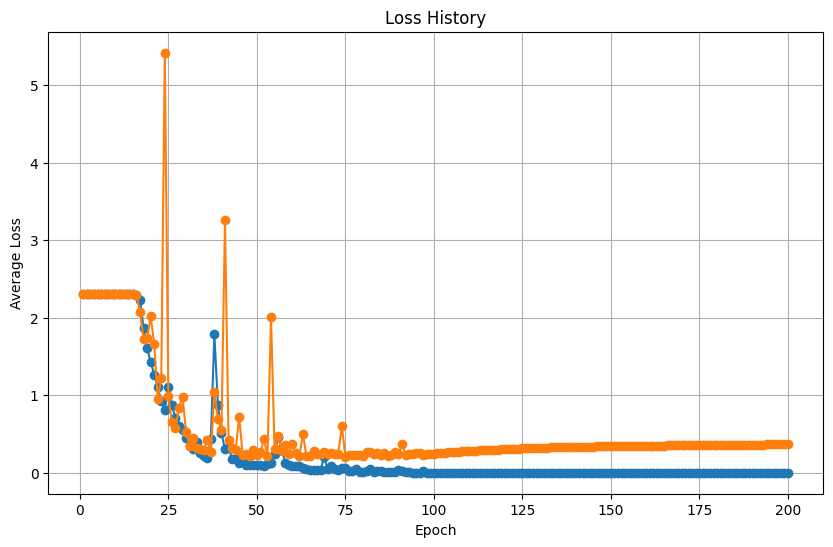

In [10]:
for epoch in range(epochs):
    total_loss = 0

    for x_batch, y_batch in train_loader:
        logits = model(x_batch)
        loss = loss_function(logits, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    loss_history.append(avg_loss)

    with torch.no_grad():
      logits = model( x_test )
      test_loss = loss_function(logits, y_test )
      test_history.append( test_loss.item() )

      print(f"Epoch {epoch+1}, Average Loss: {avg_loss:.6f}, Test Loss: {test_loss.item():.6f}")

# Plotting the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-')
plt.plot(range(1, len(test_history) + 1), test_history, marker='o', linestyle='-')
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True)
plt.show()

Training loss may sometimes go up because we are computing gradient on a batch which is used to estimate loss on the full dataset. It may just be a bad sample batch which gives a bad estimate of the full population. In theory it should push us to a smaller loss but its only for the datapoints in the batch instead of all datapoints.

May sometimes get nans because of a similar problem. To fix this, just try reducing learning rate and changing batch size.

Testing loss first goes down and then up --> **Overfitting**. It is getting more and more confident on train data but past a certain point, it is just memorizing the answers instead of learning. It won't generalize to more data, such as the test data. Could also be caused by small data.

When do we stop training? --> **Early Termination** - stop training when test loss is at a minimum. There is no value in training past that point.

In [ ]:
with torch.no_grad():
    predictions = model( x_train_small )
    predicted_classes = torch.argmax(predictions, dim=1)

print( (y_train_small == predicted_classes).float().mean() )

tensor(1., device='cuda:0')


In [ ]:
with torch.no_grad():
    predictions = model( x_test )
    predicted_classes = torch.argmax(predictions, dim=1)

print( (y_test == predicted_classes).float().mean() )

tensor(0.9537, device='cuda:0')


In [ ]:
batch_size = 4096*2
train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)